In [16]:
import sys
import pylab as plt
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
from fiber_nlse import fiber_nlse


# metrology
ps = 1e-12
km = 1e3
µm = 1e-6
nm = 1e-9

# Constants
c= 3e8

# Laser Properties

P0 = 0.5 # Lasing power
λ = 1550 * nm # wavelength
f0 = 1e10 # modulation frequency
T0 = 1/f0

# Fiber properties (SFM 28)
L = 5e3 # Delay line
neff = 1.5
D = - 20 * ps / nm / km # Dispersion factor
α = 0.046 / km # Fiber losses
β2 = -λ**2*D/(2*np.pi*c) # Dispersion constnant
#n2 =  2.4e-20  # non-linear index (SPM)
#Aeff = 70 * (µm)**2 # Effective core area
γ = 1.1 / km #0.78 / km #2*np.pi*n2/(λ*Aeff) # Non-linear factor
A = np.sqrt(P0)

In [22]:
def f(T):
    return 1*np.cos(np.pi*T/T0)**2
def f2(T):
    return np.sqrt(P0)*np.exp(-(5*T/T0)**2)*(1+np.sin(T/T0)**5)
sim = fiber_nlse.FiberNLSE()
sim.initDimensions(500*ps, 5000, L, 5000)
sim.initLosses(α)
sim.initNonLinearity(γ)
sim.initDispersion2(β2)
sim.initPrepulse(f2)
A = sim.simulate()




100%|██████████| 4999/4999 [00:07<00:00, 702.26it/s]


C:\Users\brian\AppData\Local\Temp/ipykernel_7864/3100155798.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(np.fft.fftshift(np.fft.fft(A[:,np.abs(sim.F)<200e12]),axes=1))**2)*20, cmap='Spectral')


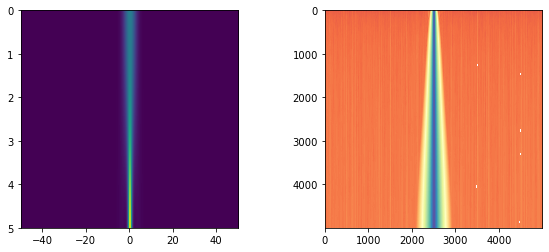

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.abs(A)**2, extent= [ -0.5*T0/ps, 0.5*T0/ps, L/km, 0], aspect=20)

plt.subplot(1,2,2)
plt.imshow(np.log10(np.abs(np.fft.fftshift(np.fft.fft(A[:,np.abs(sim.F)<200e12]),axes=1))**2)*20, cmap='Spectral')
plt.show()


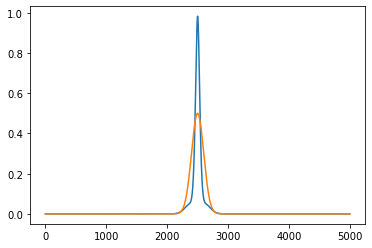

In [24]:
plt.figure()
lmax = np.argmax(np.abs(A[:,0]))
plt.plot(np.abs(A[4000,:])**2)
plt.plot(np.abs(A[0,:])**2)
plt.show()